In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing atmospheric conv neutrino data 
# contains both nu_mu and nu_e, with their bars 

data = pd.read_fwf('spl-nu-01-01-000.d', sep = ' '  ,skiprows = 1)
data

,Enu(GeV),NuMu,NuMubar,NuE,NuEbar (m^2,sec,sr,GeV)^-1
0,0.10000,1.833700e+04,1.858700e+04,9.128100e+03,8.230200e+03,NaN,NaN,NaN
1,0.11220,1.559000e+04,1.578000e+04,7.862200e+03,7.037100e+03,NaN,NaN,NaN
2,0.12589,1.320500e+04,1.331900e+04,6.690600e+03,5.938100e+03,NaN,NaN,NaN
3,0.14125,1.111600e+04,1.116800e+04,5.639700e+03,4.958700e+03,NaN,NaN,NaN
4,0.15849,9.262500e+03,9.282900e+03,4.711300e+03,4.106000e+03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
96,6309.60000,5.584400e-10,3.196000e-10,1.815400e-11,1.317600e-11,NaN,NaN,NaN
97,7079.50000,3.742300e-10,2.127500e-10,1.194700e-11,8.662500e-12,NaN,NaN,NaN
98,7943.30000,2.501600e-10,1.413300e-10,7.865100e-12,5.633200e-12,NaN,NaN,NaN
99,8912.50000,1.669800e-10,9.361100e-11,5.168100e-12,3.678200e-12,NaN,NaN,NaN


In [27]:
E_conv = np.array(data['Enu(GeV)'])  # Conventional neutrino energy in GeV

nu_mu = np.array(data['NuMu']) * 1e-4  # cross section in (cm^2 sec sr GeV)^-1
nu_mu_bar = np.array(data['NuMubar']) * 1e-4 

nu_e = np.array(data['NuE']) * 1e-4   # cross section in (cm^2 sec sr GeV)^-1
nu_e_bar = np.array(data['NuEbar  (m^2']) * 1e-4 

nu_mu_conv = nu_mu + nu_mu_bar
nu_e_conv = nu_e + nu_e_bar

In [33]:
r_conv_mu = pd.read_csv("conv mu ranjan.csv", header=None)
r_conv_e = pd.read_csv("conv e ranjan.csv", header=None)

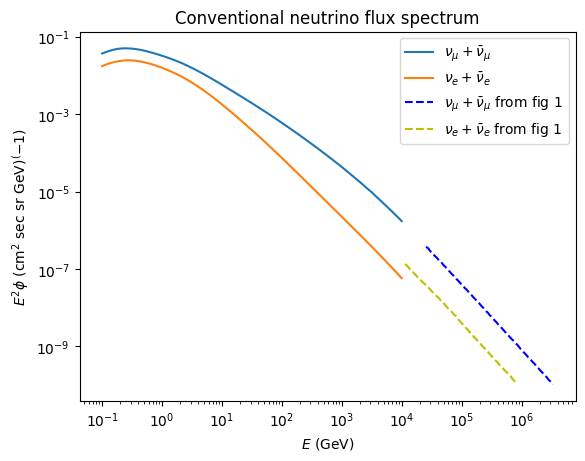

In [56]:
# Plotting E^2 phi vs E 

plt.loglog(E_conv, nu_mu_conv * (E_conv**2), label = r"$\nu_\mu + \bar{\nu}_\mu$")
plt.loglog(E_conv, nu_e_conv * (E_conv**2), label = r"$\nu_e + \bar{\nu}_e$")
plt.xlabel(r"$E$ (GeV)")
plt.ylabel(r"$E^2 \phi$ (cm$^2$ sec sr GeV)$^(-1)$")
plt.title("Conventional neutrino flux spectrum")
# plt.xlim(left = 1e3)
# plt.ylim(top = 1e-4)
plt.yticks(np.arange(1e-9, 1e-1, 1e5), labels=[])

plt.loglog(r_conv_mu[0], r_conv_mu[1], 'b--', label = r"$\nu_\mu + \bar{\nu}_\mu$ from fig 1")
plt.loglog(r_conv_e[0], r_conv_e[1], 'y--', label = r"$\nu_e + \bar{\nu}_e$ from fig 1")

plt.legend()

In [22]:
# Importing the nu_mu(-) prompt neutrino flux data set 
# from: https://arxiv.org/pdf/0806.0418

prompt = pd.read_csv("atm prompt nu_mu_bar.csv", header=None)

E_prompt = 10**(np.array(prompt[0]))  # prompt neutrino energy in GeV 
E3phi = np.array(prompt[1])  # E^3 phi in GeV^2 (cm^2 sec sr)^-1

E2phi = E3phi/(E_prompt)   # E^2 phi in G

In [42]:
r_prompt = pd.read_csv("prompt mu ranjan.csv", header=None)


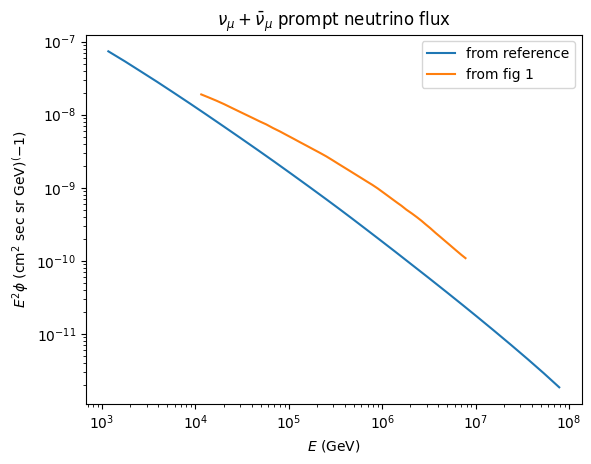

In [73]:
plt.loglog(E_prompt, E2phi, label="from reference")
# plt.loglog(E_prompt, np.gradient(E3phi, E_prompt), '--')
plt.loglog(r_prompt[0], r_prompt[1], label="from fig 1")
plt.xlabel(r"$E$ (GeV)")
plt.ylabel(r"$E^2 \phi$ (cm$^2$ sec sr GeV)$^(-1)$")
plt.title(r"$\nu_\mu + \bar{\nu}_\mu$ prompt neutrino flux")
plt.legend()